In [1]:
import pandas as pd
import numpy as np
# import nltk
# from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
# df = pd.read_csv('../local/az_reduced_reviews.csv')
# x_df = df[df.stars != 3]
# #ignore warning
# x_df['binary_stars'] =  np.where(x_df['stars'] >= 4, 1, 0)
# X_train, X_test, y_train, y_test = train_test_split(x_df.text, x_df.binary_stars, test_size=0.50, random_state=42)
# result = pd.concat([X_train, y_train], axis=1)
# result.to_csv('sub_sample_az.csv', header=['text', 'binary_stars'])

In [2]:
x_df = pd.read_csv('sub_sample_az.csv')


In [5]:
x_df.describe()

,Unnamed: 0,binary_stars
count,405285.000000,405285.000000
mean,459190.719025,0.756786
std,265775.569536,0.429024
min,1.000000,0.000000
25%,228710.000000,1.000000
50%,459016.000000,1.000000
75%,689207.000000,1.000000
max,920352.000000,1.000000


In [9]:
print(len(x_df.iloc[0][1]), x_df.iloc[0][1])

613 YEAH!!!  AGRITOPIA!!!  In case of zombie apocalypse I will be setting up my KINGDOM here. After wandering through BARONE and Joe's and the lines being SUPER long we decided to get a sandwich at the coffee shop.  Awesome and cute little place, GREAT CUPCAKES!!  Me and my daughter split the veggie wrap and a couple of beverages from the cooler. I loved the place. They had a great pesto aioli on the wrap that we were scooping up with our chips. ONE SUGGESTION.......with such a great menu, I think they could step up the wrap selection instead of using a plain ol tortilla, I think you guys are better than that.


In [59]:
# x_df['txt_length'] = x_df['text'].apply(len)

for i in range(len(x_df)):
    if x_df.txt_length[i] < 50:
        print(x_df.text[i], '\n')

Good Networking Party tonight at Buster's. 

Delicious Arizona chili and fresh bread heaven! 

Changed name to Cha Da Thai.... same great food 

Bloody Mary and mimosa bar are awesome. 

I adore Dick's for breakfast\/brunch. Oh! 

ok 

Really like that mushroom cheese steak sandwich. 

fresh, yummy and genuine staff.  hidden treasure! 

Vegetarian sub was fresh and full of flavor. 

Great French onion soup and French dip sand 

Fabulous service tonight and it was crowded! 

street tacos done good!
(from a food truck) 

Good food big portions reasonably priced. 

Cool bar in central Phoenix...love this place! 

Poor service, medicore food, won't be back. 

Good food, with kid friendly atmosphere! 

cheap ... but better than the one on dysart 

Nice place!! LOVED thai iced tea!!!! 

Just laid back. A good beginning to a night out. 

Solid brunch for 10, quick service and good food. 

Just passable food. Poor value for the money. 

Friendly staff
Great speedy service 

unique and deliciou

Best salad ever!  A must at this airport! 

Great service, bagels are awesome. Perfect! 

Yummy sandwiches and cupcakes 

Lol closed 

Amazing selection and very good service. 

Pra Ram is outstanding, best peanut sauce around. 

Neither 

Loved this place 

Good pizza! Friendly service. Terrific value! 

Classic diner with excellent food and service. 

Amazing, great, tons of food for a awesome price! 

Not a good value even with a groupon.  Food OK 

I heart beef bulgogi bento boxes! :) 

Good place for a beer. Excellent boneless wings. 

Carne Adovada...
that's all you need to know! 

Avocado egg rolls WIN! Pizza is ok. 

Staff was great, food good. Way too hot in there! 

Tastes like just bread. Wasn't good at all. 

Chat is very good. Try samosa and bada pav. 

Legendary bar in my book. Great stage and people. 

Plenty of brisket and potato salad for two meals! 

Great tots. Great gluten free bun. 

Fuking amazing food wow! 

Mr pib is flat, Friday fish fry is great. 

Highly reco

It was good. Will miss you. 

Closed for good. So sad. :'( 

Yuck. Grease infested grossness.  Really bad. 

Loved It. Feels like eating Tacos in LA! 

Pizza was great, wine kept the girlfriend happy! 

Great gluten free pizza and wings! 

Brian the bartender rocks! Dales on tap = love 

Wonderful morning coffee place! Nice people. 

FABULOUS! OMG! Looking forward to taco Tuesdays. 

Great place to sit, eat and watch sports! 

They are out of business, no more Lou for you! 

This place is just okay. I prefer Eddie Vs. 

Very friendly, warm and cozy... Fabulous food. 

SO GOOD! Best Sonoran Dogs around by far. 

Best fish tacos ever. You gotta try them. 

Great Chicago style pizza!  A+ in my book. 

Mac and cheese very good. BBQ, just ok. 

Service was great!!! Ask for Aubrey! 

As close as it gets to my mama's cookin 

Love Barros and have always had good service! 

No 

best donut holes!!! fast and friendly service too 

Good service. Delicious vegetarian fare. 

Best juice spot in th

Good Food. Great Mom and Pop Sports Bar. 

Mmmm...

Best burgers and the cajun fries....wow! 

Best burgers in Arizona!!  'Nough said. 

Good food and fun but slow service. 

I really love their cheeseburger.Amazing. 

Sirloin steak wedge salad is so satisfying! 

c'est magnifique!!! 

I love Lola... the matador is simply craveable! 

Great location, tasty juices, and friendly staff. 

Try the spicy BBQ sauce. Yummy. 

Great inexpensive breakfast. Very tasty. 

Large selection, great staff 

Best Subs around period. 

This places ooozes good taste 

Food is okay but, good luck getting service! 

Reverse Happy Hour rocks--- great late night find 

Great place to relax with a good glass of wine. 

Best ice tea in town! I go to this place daily :) 

Best ceviche in town! 

Fast, fun, delicious, cheap. Nuff said. 

Great pizza, reasonable prices, good times. 

good stuff 

i love this place we need one in tucson! 

Excellent service, good music and great food. 

The panang curry lunch spec

613

In [50]:
x_df.txt_length[x_df.txt_length < 100].count()



14493

(array([1.6584e+04, 7.7743e+04, 7.0274e+04, 5.3855e+04, 3.9937e+04,
        3.0071e+04, 2.3125e+04, 1.8261e+04, 1.4004e+04, 1.1043e+04,
        8.8340e+03, 7.1390e+03, 5.7850e+03, 4.7270e+03, 3.9080e+03,
        3.2240e+03, 2.5670e+03, 2.1440e+03, 1.7710e+03, 1.5470e+03,
        1.2820e+03, 1.0560e+03, 8.3600e+02, 7.2800e+02, 6.1300e+02,
        5.5700e+02, 4.5700e+02, 4.0300e+02, 3.8500e+02, 3.0600e+02,
        2.5000e+02, 2.2300e+02, 1.8800e+02, 1.7000e+02, 1.5500e+02,
        1.3000e+02, 1.0600e+02, 8.0000e+01, 1.0100e+02, 8.3000e+01,
        6.9000e+01, 6.5000e+01, 5.7000e+01, 5.4000e+01, 4.5000e+01,
        5.2000e+01, 4.1000e+01, 4.0000e+01, 5.9000e+01, 1.5100e+02]),
 array([1.00000e+00, 1.02020e+02, 2.03040e+02, 3.04060e+02, 4.05080e+02,
        5.06100e+02, 6.07120e+02, 7.08140e+02, 8.09160e+02, 9.10180e+02,
        1.01120e+03, 1.11222e+03, 1.21324e+03, 1.31426e+03, 1.41528e+03,
        1.51630e+03, 1.61732e+03, 1.71834e+03, 1.81936e+03, 1.92038e+03,
        2.02140e+03, 2.122

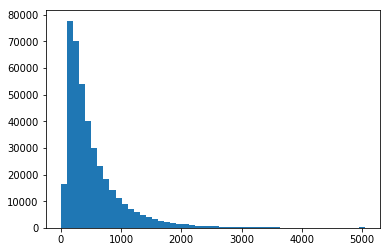

In [45]:
import matplotlib.pyplot as plt

plt.hist(x_df.txt_length, bins=50)

In [10]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(x_df.text, x_df.binary_stars, test_size=0.20, random_state=42)

In [11]:
#quick pipeline to show best performing nb

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer()),  
                     ('clf', MultinomialNB(fit_prior=False)), #added fitprior
                    ])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

# 92.68% CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))
# 94.67% w/ fit prior

0.9467781931233576

In [21]:
n=0
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        n += 1
        print(predicted[i], y_test.iloc[i], X_test.iloc[i], '\n\n\n')
        if n > 10:
            break
        

1 0 Los meseros les gusta tips. So aqui tengo un tip. Yo ordene mi comida para comer ahi y hasta le dije a la cajera "esto va hacer para aqui" me dice "okay" me siento y llega la misma mesera y dice "sorry te lo hicieron para llevar" me dio la comida y se fue. Yo trabajo para dos restaurantes y cada ves que nos pasa esto a nosotros decimos "perdon, le voy a decir a un chef que ponga esto en un plato". Eso es mi tip para ustedes. Por eso no regresaré, por algo chico que muy fácilmente podían arreglar pero no les vale, ni me preguntan "todo bien?" "Lo quieres para aqui?" "Te lo arreglamos?" "Como esta la comida y su servicio?" ahora solo ire a TORTAS PAQUIME para comprar mis tortas... 



0 1 This is my dirty little secret. You can seriously eat your face off for a ridiculously small amount of money. It makes me wonder how they do it. It's a shameful feeling I get inside when I see that I have the highest sushi tower ... until I see it only cost me $12. I literally have never been able t

In [23]:
#quick pipeline to show best performing nb

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(2, 2))),
                     ('tfidf', TfidfTransformer()),  
                     ('clf', MultinomialNB()),
                    ])
text_clf = text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
np.mean(predicted == y_test)

# % CountVectorizer(stop_words='english', min_df=5, ngram_range=(2, 2))

0.9264098103803496

In [12]:
#quick pipeline to show best performing svm

text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english', min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()), 
                         ('clf-svm', SGDClassifier(loss='modified_huber', class_weight = 'balanced', penalty='l2', alpha=1e-3, max_iter=5, random_state=42)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

# 87.87% CountVectorizer(stop_words='english', min_df=5)
# 92.3% SGDCClassifier class_weight = 'balanced' loss='hinge'
# 93.3% SGDCClassifier class_weight = 'balanced' loss='modified_huber'

/home/pbarranger/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.9330964629828392

In [13]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print(review_len/count_r)
        

121.29207232267038


In [14]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    if predicted_svm[i] != y_test.iloc[i]:
        review_len += len(X_test.iloc[i].split())
        count_r += 1
        
print(review_len/count_r)

128.9546376544348


In [16]:
review_len = []
for i in range(len(predicted)):
    if predicted[i] != y_test.iloc[i]:
        review_len.append(len(X_test.iloc[i].split()))

        

In [21]:
svm_review_len = []
for i in range(len(predicted)):
    if predicted_svm[i] != y_test.iloc[i]:
        svm_review_len.append(len(X_test.iloc[i].split()))


In [25]:
np.min(review_len)

1

In [26]:
np.min(svm_review_len)

1

In [15]:
review_len = 0
count_r = 0
for i in range(len(predicted)):
    review_len += len(X_test.iloc[i].split())
    count_r += 1
        
print(review_len/count_r)

98.72020923547628


In [49]:
# nb_pred_prob = text_clf.predict_proba(X_test)
svm_pred_prob = text_clf_svm.predict_proba(X_test)

In [50]:
print(nb_pred_prob[0])
print(max(nb_pred_prob[0]))
print(predicted[0])
print(svm_pred_prob[0])
print(max(svm_pred_prob[0]))
print(predicted_svm[0])

[0.25970701 0.74029299]
0.7402929904746972
1
[0.47710346 0.52289654]
0.5228965426053269
1


In [55]:
best_pred = []
for i in range(len(predicted)):
    if max(svm_pred_prob[i]) > max(nb_pred_prob[i]):
        best_pred.append(predicted_svm[i])
    else:
        best_pred.append(predicted[i])



In [56]:
np.mean(best_pred == y_test)


0.9483449917958967

In [25]:
n=0
# while n<5:
for i in range(len(predicted_svm)):
    if predicted_svm[i] != y_test.iloc[i]:
        n += 1
        print(predicted_svm[i], y_test.iloc[i], X_test.iloc[i], '\n\n\n')
        if n > 10:
            break

0 1 We've have been looking for a favorite Mexican restaurant since moving to AZ.  One visit and this place looks promising.  We went on a busy Friday night.  Had to wait a while and as we spoke with the other people waiting, they were all long time patrons.  Another very promising sign.  We were seated in the bar at a cozy booth and were served drinks, chips and salsa with beans right away.  We ordered and the food arrived pretty quickly.  We never had to ask for refills, the drinks just kept being refilled and they checked back often to see if we needed anything.  It was a great service experience and the food was very good. 



1 0 Los meseros les gusta tips. So aqui tengo un tip. Yo ordene mi comida para comer ahi y hasta le dije a la cajera "esto va hacer para aqui" me dice "okay" me siento y llega la misma mesera y dice "sorry te lo hicieron para llevar" me dio la comida y se fue. Yo trabajo para dos restaurantes y cada ves que nos pasa esto a nosotros decimos "perdon, le voy a d

In [31]:
from sklearn.metrics import f1_score

print(f1_score(y_test, predicted, average='weighted'))
print(f1_score(y_test, predicted_svm, average='weighted'))

0.9466540787752862
0.9246250027519819


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(f1_score(y_test, predicted, average="macro"))
print(precision_score(y_test, predicted, average="macro"))
print(recall_score(y_test, predicted, average="macro"))

0.8911035931036251
0.9364841597319095
0.8611040694807633


In [32]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test, predicted, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9465571766600978
recall: 0.9467781931233576
fscore: 0.9466540787752862
support: None


In [33]:
precision, recall, fscore, support = score(y_test, predicted_svm, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9284852620743609
recall: 0.9230664840791049
fscore: 0.9246250027519819
support: None


In [57]:
precision, recall, fscore, support = score(y_test, best_pred, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.9487485860224252
recall: 0.9483449917958967
fscore: 0.9485177491432579
support: None


In [34]:
precision, recall, fscore, support = score(y_test, predicted_svm)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.80171024 0.96922736]
recall: [0.90833925 0.92779942]
fscore: [0.85170036 0.94806103]
support: [19714 61343]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(X_train)

In [ ]:

def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0
            
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=100000))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=5, validation_data=(X_test, y_test),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)
